In [21]:
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import seaborn as sns

In [22]:
dframe = DataFrame.from_csv("Data/All_data.csv",sep=",")

In [7]:
# For each 30 mon
df_30 = dframe.loc[:,"load_avg_1_min":"mem_free_mb"].resample("30min").mean()
#df_30_1 = dframe.resample("30min")


In [8]:
dframe.count()

load_avg_1_min         60000
cpu_wait_perc          60000
net_out_packets_sec    60000
cpu_system_perc        60000
net_in_bytes_sec       60000
mem_free_mb            60000
V0                     60000
dtype: int64

In [37]:
Ellis = dframe['load_avg_1_min'].resample("30min")

In [38]:
Ellis;

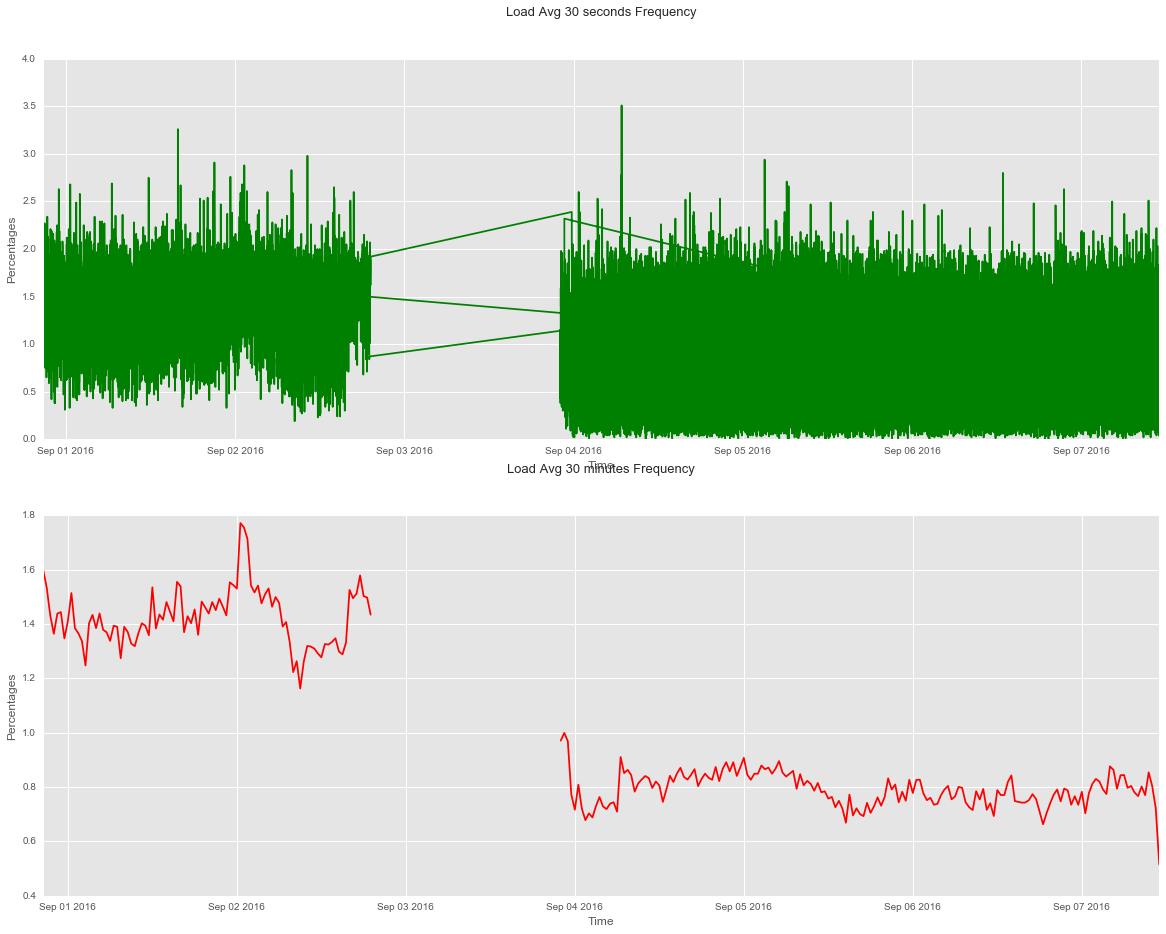

In [46]:
fig, ax = plt.subplots(2,1,figsize=(20,15))
ax[0].plot(dframe['load_avg_1_min'],color='green')
ax[0].set_xlabel('Time',fontsize=12)
ax[0].set_ylabel('Percentages',fontsize=12)
ax[0].set_title('Load Avg 30 seconds Frequency', fontsize=13,y=1.1)



ax[1].plot(Ellis,color='red')
ax[1].set_xlabel('Time',fontsize=12)
ax[1].set_ylabel('Percentages',fontsize=12)
ax[1].set_title('Load Avg 30 minutes Frequency', fontsize=13,y=1.1)



In [11]:
def plot(dframe,*args,**kwargs):
    fig, ax = plt.subplots(figsize=(20,15))
    ax.plot(dframe,color='green')
    ax.set_xlabel('xLabel',fontsize=12)
    ax.set_ylabel('yLabel',fontsize=12)
    ax.set_title('Here is My Title', fontsize=13,y=1.1)

In [7]:
df_30.head()

,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb
Timestamp,,,,,,
2016-08-31 20:30:00,1.598776,16.742857,65.808844,1.014286,5622.020408,4888.367347
2016-08-31 21:00:00,1.532917,17.148333,65.830240,0.702500,5619.934114,4882.250000
2016-08-31 21:30:00,1.430917,16.954167,65.459444,0.711667,5590.360556,4878.908333
2016-08-31 22:00:00,1.364250,16.299167,65.336389,0.733333,5575.998333,4874.933333
2016-08-31 22:30:00,1.438333,16.546667,65.521667,0.739167,5591.530556,4870.408333


In [8]:
df_30.loc[:,"load_avg_1_min":"mem_free_mb"].head()

,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb
Timestamp,,,,,,
2016-08-31 20:30:00,1.598776,16.742857,65.808844,1.014286,5622.020408,4888.367347
2016-08-31 21:00:00,1.532917,17.148333,65.830240,0.702500,5619.934114,4882.250000
2016-08-31 21:30:00,1.430917,16.954167,65.459444,0.711667,5590.360556,4878.908333
2016-08-31 22:00:00,1.364250,16.299167,65.336389,0.733333,5575.998333,4874.933333
2016-08-31 22:30:00,1.438333,16.546667,65.521667,0.739167,5591.530556,4870.408333


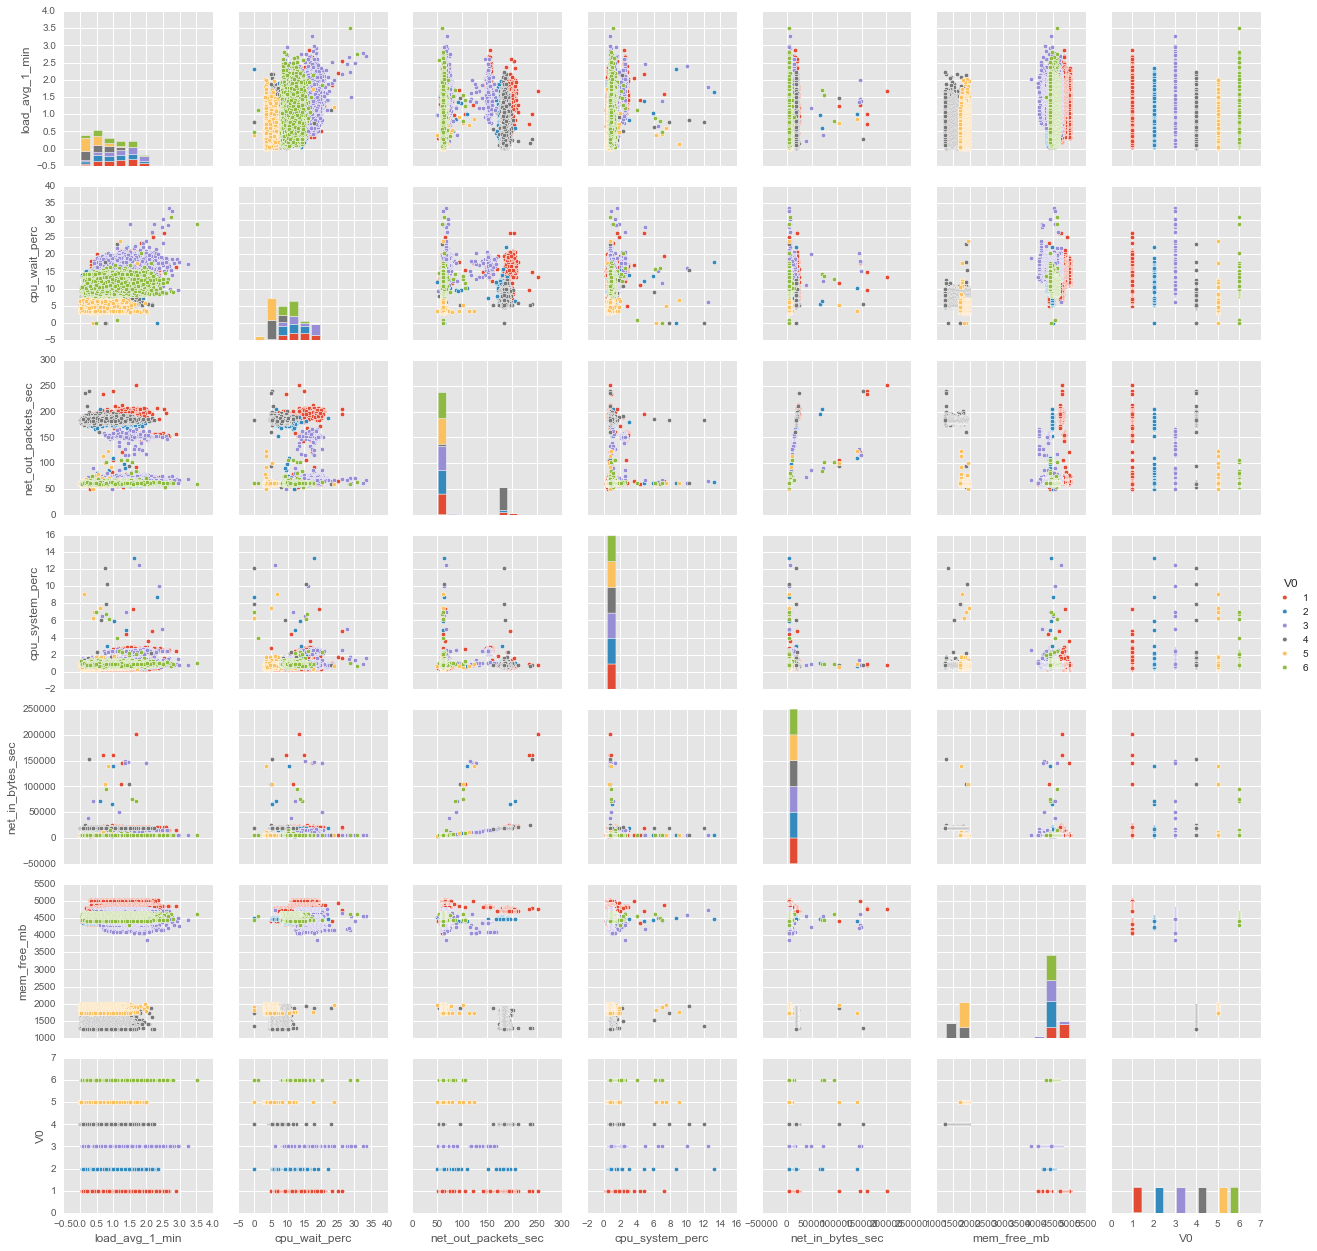

In [49]:
sns.pairplot(dframe,hue='V0')

In [12]:
#Ellis = [x for x in dframe.values if dframe.V0.any() == 1] 

In [13]:
Ellis = dframe[dframe.V0 == 1]

In [14]:
Ellis_30 = Ellis.loc[:,"load_avg_1_min":"mem_free_mb"].resample("30min").mean()

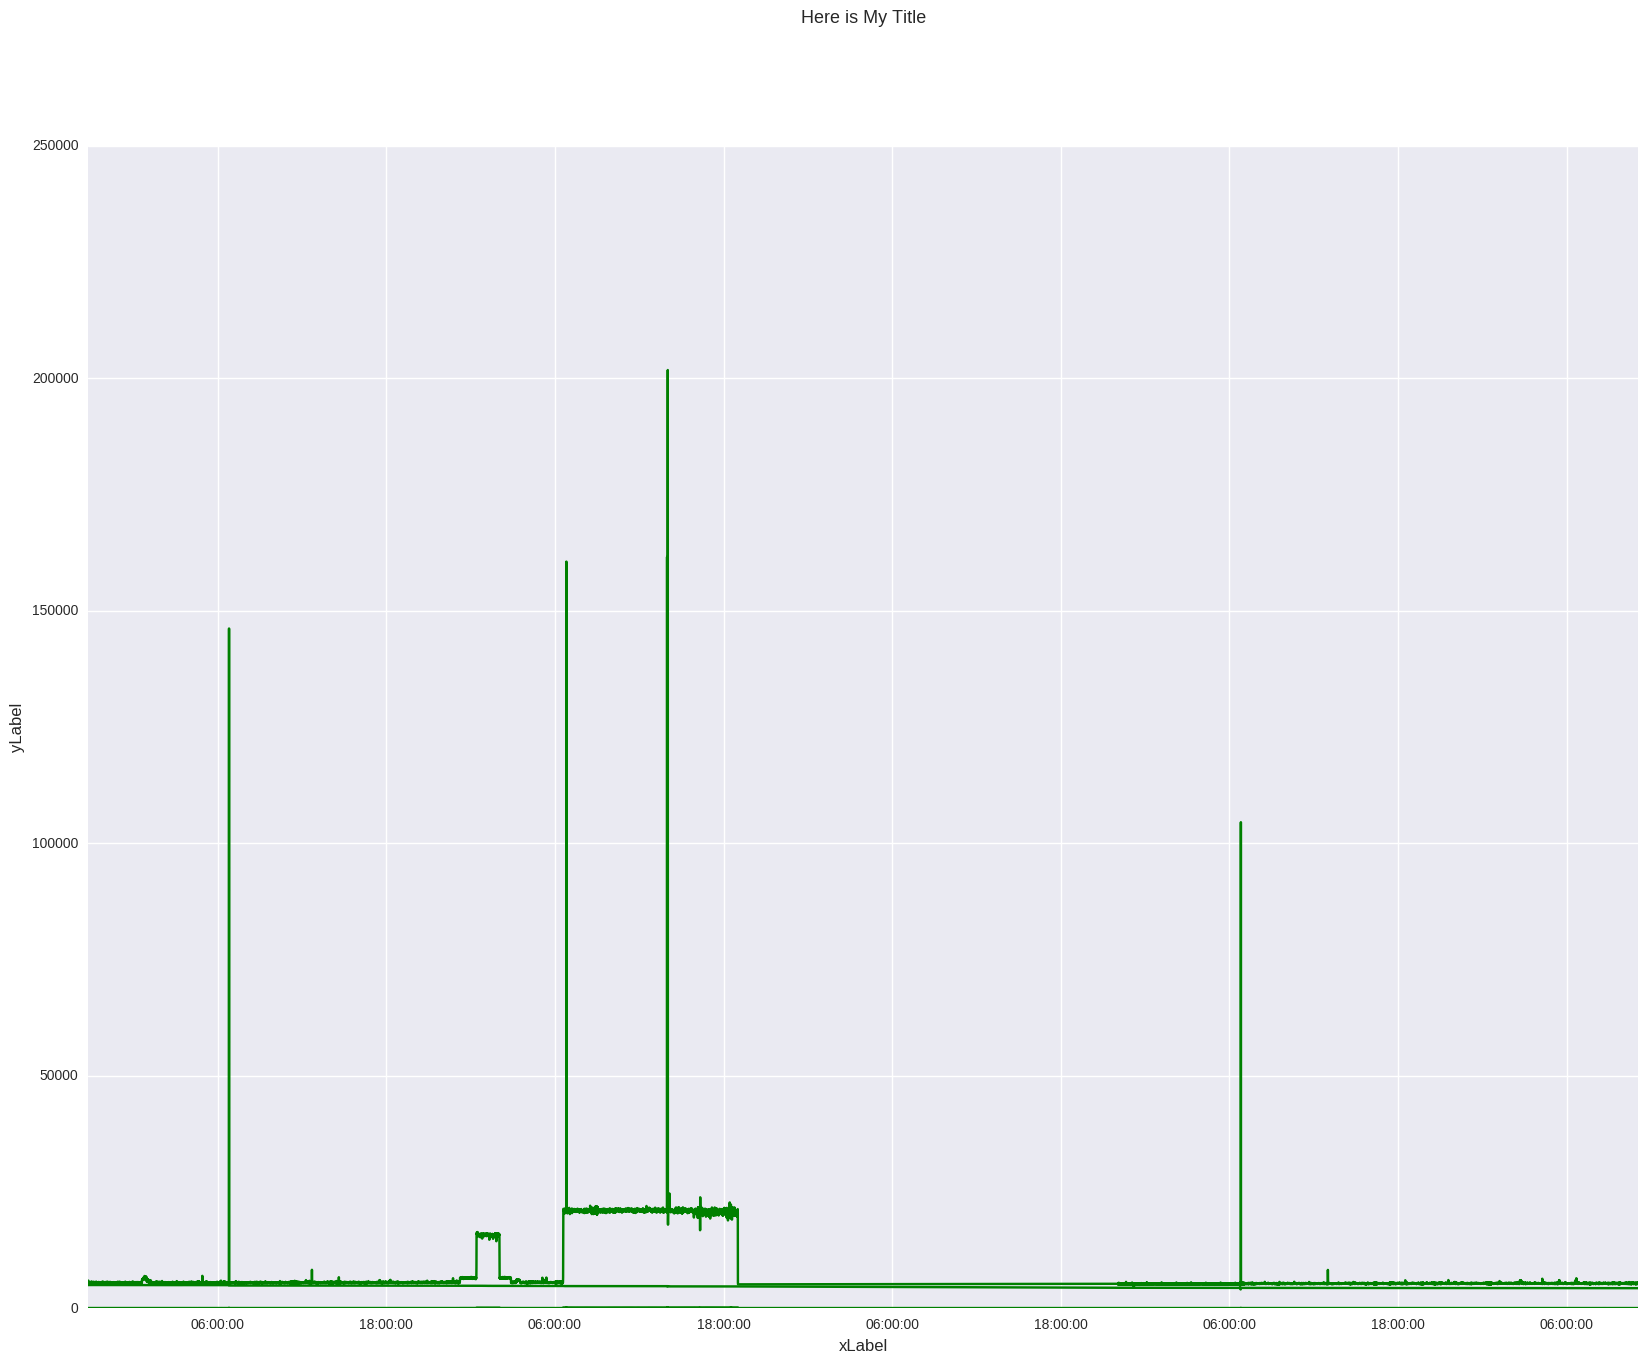

In [15]:
plot(Ellis)

In [16]:
Ellis.columns

Index([u'load_avg_1_min', u'cpu_wait_perc', u'net_out_packets_sec',
       u'cpu_system_perc', u'net_in_bytes_sec', u'mem_free_mb', u'V0'],
      dtype='object')

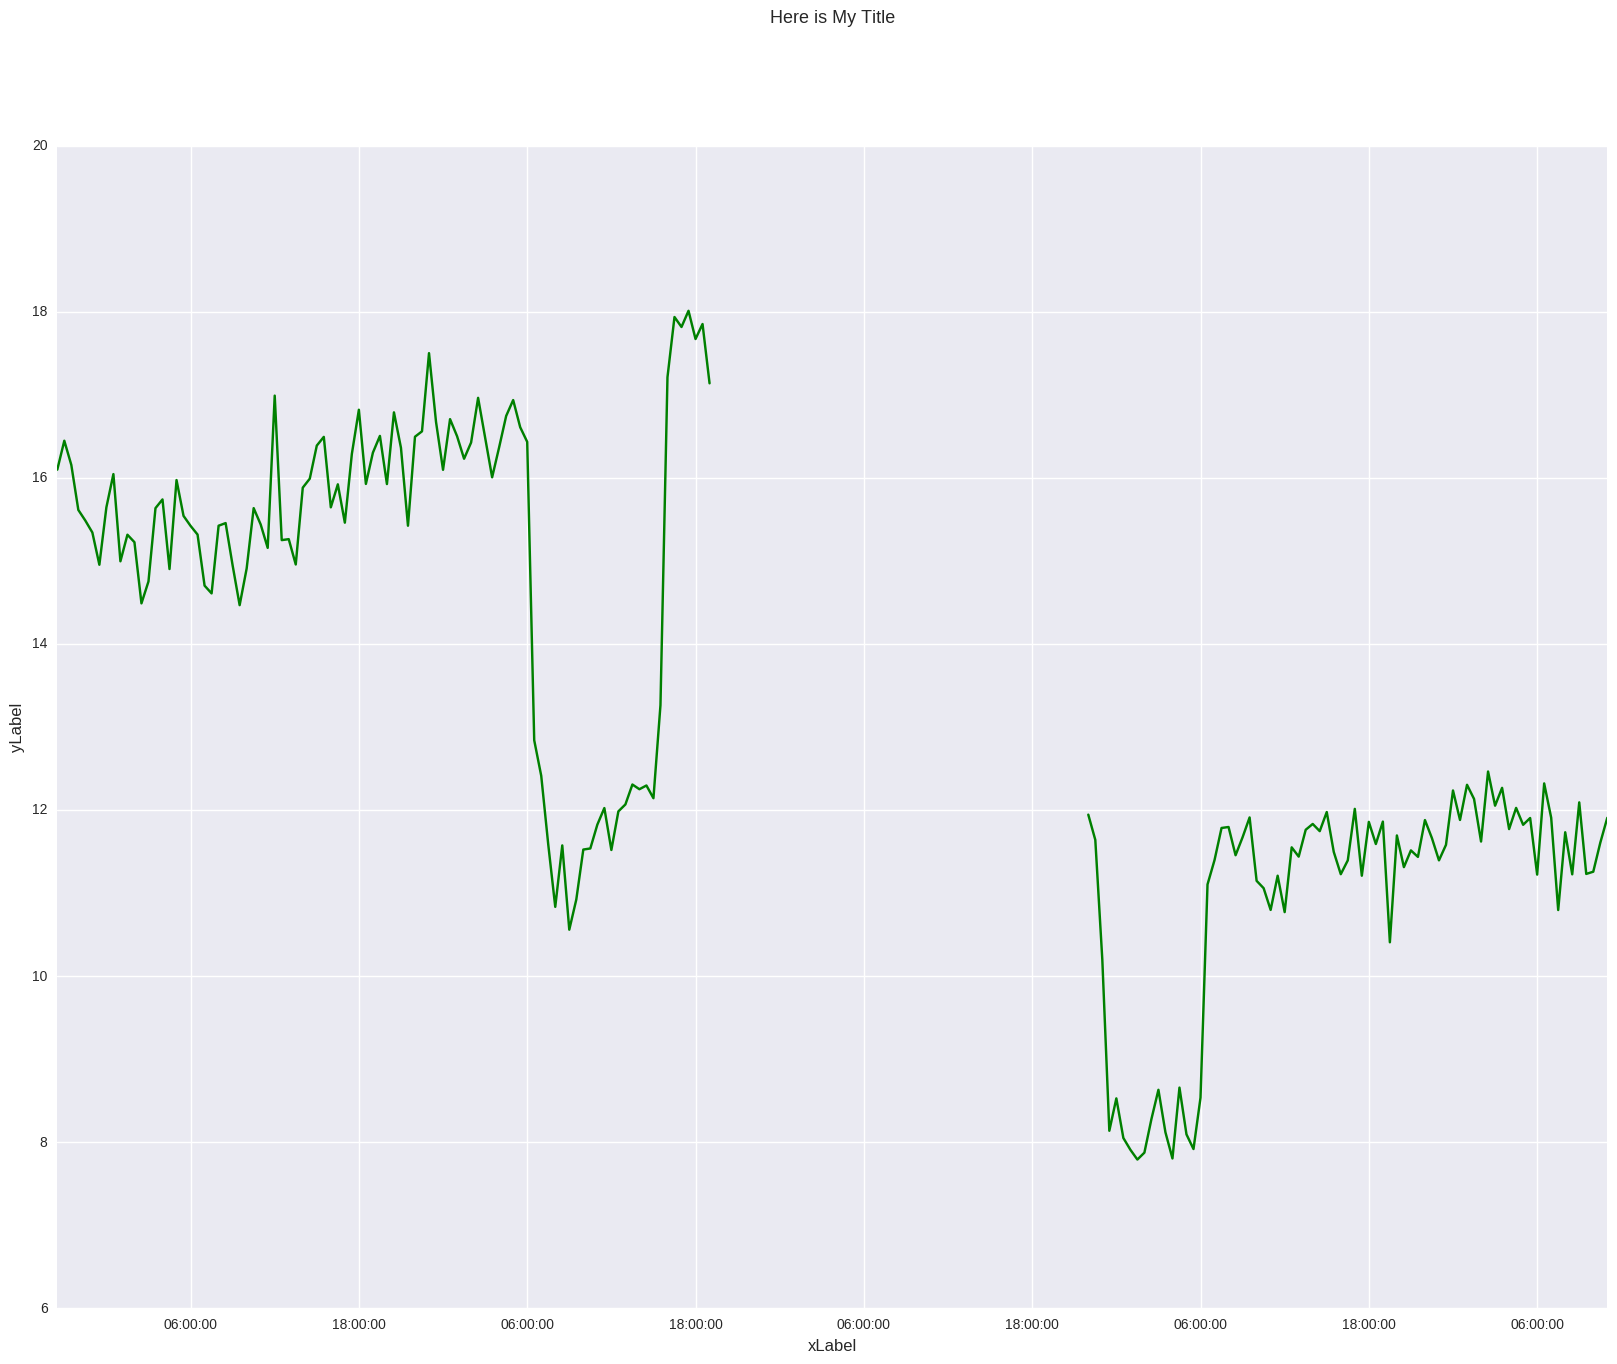

In [17]:
plot(Ellis['cpu_wait_perc'].resample("30min").mean())

In [18]:
Ellis.columns

Index([u'load_avg_1_min', u'cpu_wait_perc', u'net_out_packets_sec',
       u'cpu_system_perc', u'net_in_bytes_sec', u'mem_free_mb', u'V0'],
      dtype='object')

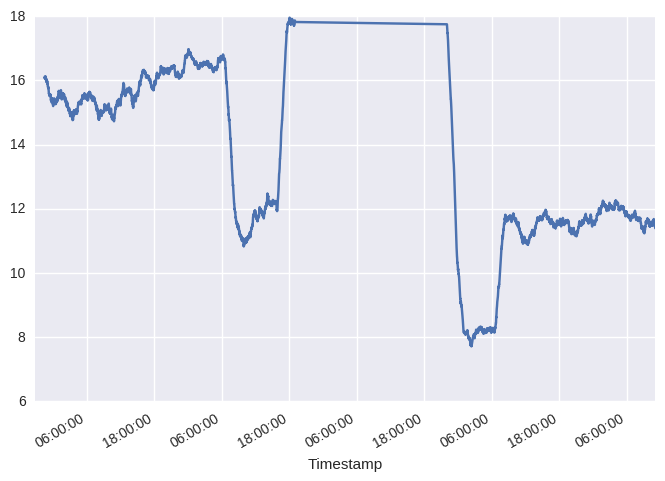

In [19]:
#for col in Ellis.columns:
#Ellis["cpu_wait_perc"].plot(subplots=True,figsize=(10, 5),table=False)
#Ellis["load_avg_1_min"].plot(subplots=True,figsize=(10, 5),table=False)
#Ellis["net_out_packets_sec'"].plot(subplots=True,figsize=(10, 5),table=False)
#Ellis["cpu_system_perc"].plot(subplots=True,figsize=(10, 5),table=False)
#Ellis["net_in_bytes_sec'"].plot(subplots=True,figsize=(10, 5),table=False)

Ellis["cpu_wait_perc"].rolling(200).mean().plot(label='28D MA')

#Ellis["V0"].plot(subplots=True,figsize=(10, 5),table=False)


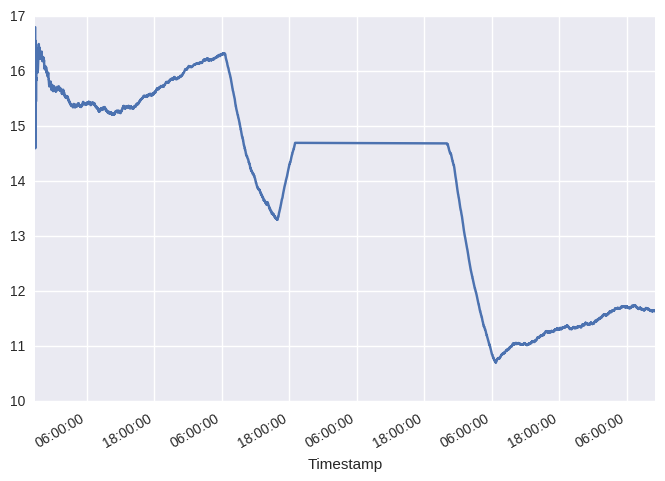

In [20]:
Ellis["cpu_wait_perc"].ewm(alpha=0.001).mean().plot(label='28D MA')

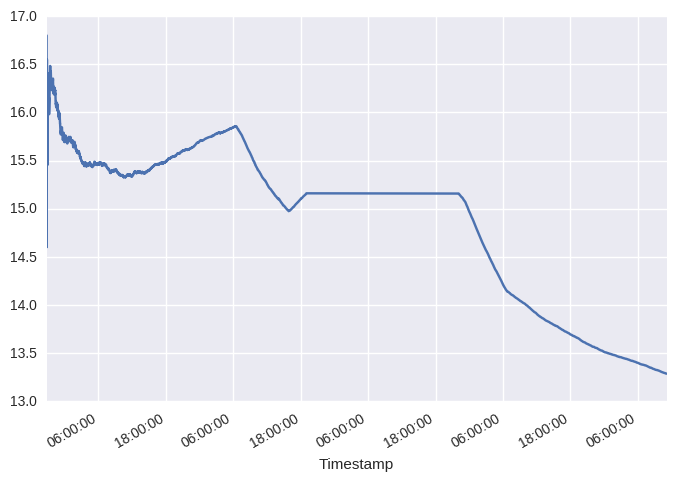

In [21]:
Ellis["cpu_wait_perc"].expanding().mean().plot(label='Expanding')

In [22]:
roll = Ellis["cpu_wait_perc"].rolling(100, center=True)
roll

Rolling [window=100,center=True,axis=0]

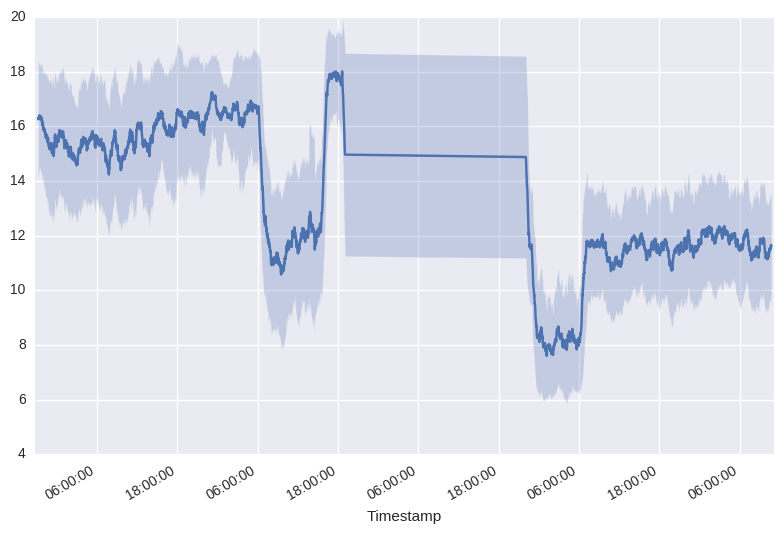

In [23]:
m = roll.agg(['mean', 'std'])
ax = m['mean'].plot()
ax.fill_between(m.index, m['mean'] - m['std'], m['mean'] + m['std'],
                alpha=.25)
plt.tight_layout()
sns.despine()

In [24]:
pred = res_seasonal.get_prediction(start='2001-03-01')
pred_ci = pred.conf_int()

ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
sns.despine()


NameError: name 'res_seasonal' is not defined

In [25]:
#pred_dy = res_seasonal.get_prediction(start='2002-03-01', dynamic='2013-01-01')
#pred_dy_ci = pred_dy.conf_int()

pred_dy = Ellis
pred_dy_ci = Ellis

ax = y.plot(label='observed')
pred_dy.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_dy_ci.index,pred_dy_ci.iloc[:, 0],pred_dy_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.Timestamp('2013-01-01'), y.index[-1],alpha=.1, zorder=-1)
ax.annotate('Dynamic $\\longrightarrow$', (pd.Timestamp('2013-02-01'), 550))

plt.legend()
sns.despine()

NameError: name 'y' is not defined

In [26]:
Ellis.ix['2016-08-31 20:47:23.230']

load_avg_1_min            2.04
cpu_wait_perc            16.80
net_out_packets_sec      65.80
cpu_system_perc           3.60
net_in_bytes_sec       5967.80
mem_free_mb            4997.00
V0                        1.00
Name: 2016-08-31 20:47:23.230000, dtype: float64

In [29]:
Ellis.columns

Index([u'load_avg_1_min', u'cpu_wait_perc', u'net_out_packets_sec',
       u'cpu_system_perc', u'net_in_bytes_sec', u'mem_free_mb', u'V0'],
      dtype='object')

In [ ]:
sns.pairplot(dframe[dframe.V0 == 1], x_vars=['load_avg_1_min','cpu_wait_perc','net_out_packets_sec','net_out_packets_sec'], y_vars=dframe[dframe.V0 == 1].index, size=2.5, aspect=1, kind='reg')

In [ ]:
Ellis